<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing Basics** (part of the machine learning module)

for MArch Urban Design RC18, The Bartlett School of Architecture, UCL

Coursse Tutor: William Huang (ucfnhua@ucl.ac.uk)

Last modified in February 2023

## 1. Import Necessaery Packages

In [1]:
import numpy as np

import cv2 as cv
from google.colab.patches import cv2_imshow # cv.imshow()

from scipy import ndimage as ndi
from skimage.io import imread
from skimage.io import imshow
from skimage import data
from skimage.exposure import histogram
#from skimage.color import rgb2grey
from skimage.filters import gaussian

import matplotlib.pyplot as plt

from google.colab import drive

from glob import glob

#### Connect Notebook and Your Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Read Images

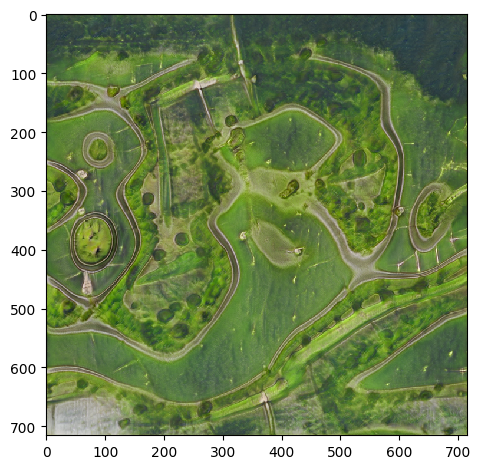

In [3]:
# Define the filename for the image
filename = 'test' #@param{type:"string"}

# Specify the data format or file extension of the image
data_format = '.png' #@param ['.png', '.jpg', '.bmp', '.tif'] {type:'string'}

# Construct the full path to the image using the provided filename and data format
PATH = '/content/drive/My Drive/' + filename + data_format

# Read the image from the specified path
img = imread(PATH)

# Convert the read image to grayscale using OpenCV
# Note: The line to convert the image to grayscale using skimage (rgb2grey) is commented out
#img2 = rgb2grey(imread(PATH))
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Get the width and depth (dimensions) of the grayscale image
w, d = img2.shape

# Display the original image
imshow(img)

#### Load Batch Images

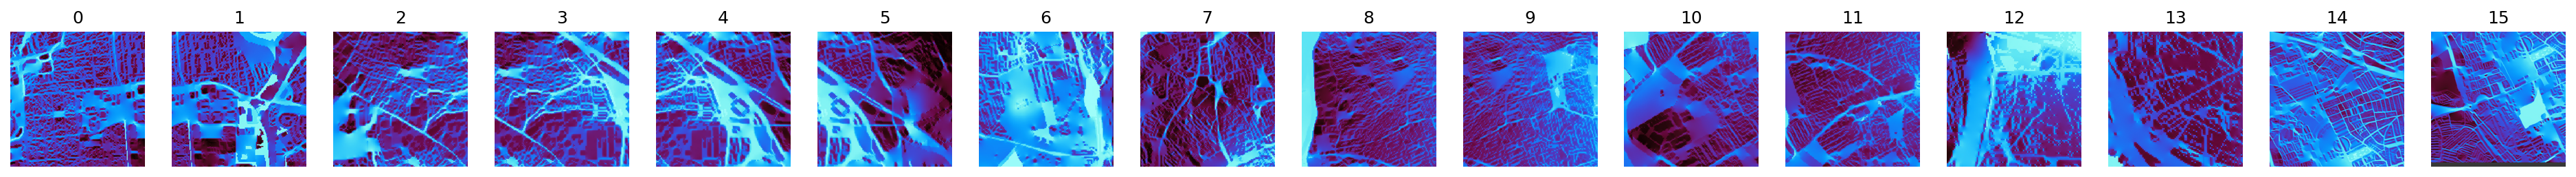

In [8]:
# Define the path to the directory containing the images
folder_name = 'connectivity_w' #@param{type:"string"}
path = '/content/drive/My Drive/' + folder_name

format = '.jpg' #@param ['.png', '.jpg', '.bmp', '.tif'] {type:'string'}

# Read all the images from the specified directory and convert them from BGR to RGB
images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(path + '/*' + format)]

# Specify the number of data points or images to be displayed
num_of_data = 16

# Set up the figure for plotting with specified size and resolution
plt.figure(figsize=(32, 2), dpi=150)

# Loop through the images and display them in a subplot
for i in range(16):
    plt.subplot(1, num_of_data, i+1)  # Define the subplot position
    plt.title(i)  # Set the title of the subplot to the current index
    plt.axis('off')  # Turn off axis numbering and ticks
    plt.imshow(images[i])  # Display the image

# Note: Remember to add 'plt.show()' if you want to display the plot when running the script outside of a notebook environment.


Note: OpenCV uses BGR image format as the default.

#### Another Option:
use `google.colab.files.upload()` to work with data stored in your machine.

In [9]:
# upload data using GUI; it works with data saved outside google drive
from google.colab import files
uploaded = files.upload()

In [ ]:
# check contents
import os

list_dir = os.listdir() # Get a list of all files and directories in the current directory
list_dir.sort() # Sort the list in ascending order
print(list_dir) # Print the sorted list to the console

`[expression for item in iterable if condition]`

Expression: `x`

Interable: `list_dir`

Condition: `'.jpg' in x`

In [ ]:
[x for x in list_dir if '.jpg' in x] # filter out what is not jpg image

#### Quiz: Plot 16 images in a 4*4 image grid.

In [ ]:
FSZ = 6 #@param{type:"slider", min:0, max:100, step:0.5}

plt.figure(figsize = (8, 8), dpi=150)

for i in range(int(16**0.5)):
    for j in range(int(16**0.5)):
            index = (i+1) + (j*int(num_of_data**0.5)) # (column location) + (row location)
            plt.subplot(num_of_data**0.5, num_of_data**0.5, index)
            plt.title(index-1, fontsize=FSZ)
            plt.axis('off')
            plt.imshow(images[index-1])

## 3. Scale Images

Matrices for affine transformation operations:

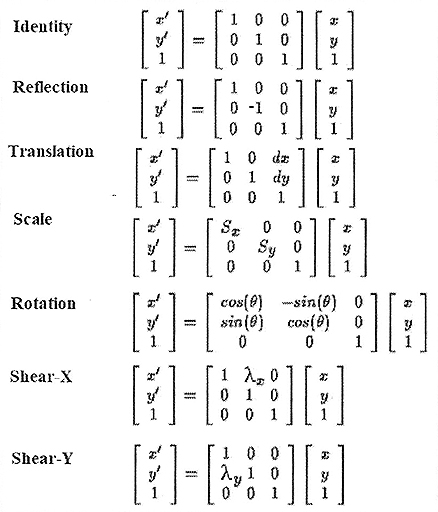

#### Method 1: based on numpy array

In [ ]:
scale_x = 1.5 #@param{type:"slider", min:0, max:4, step:0.25}
scale_y = 1.5 #@param{type:"slider", min:0, max:4, step:0.25}
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img, img_scale)
# plt.axis('off')
imshow(img_scaled)

#### Method 2: based on opencv

`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`

In [ ]:
print(img.shape) # check image shape

In [ ]:
# percent of original size
scale_percent = 20 #@param{type:"slider", min:1, max:100, step:0.5}
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

im_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)

cv2_imshow(im_resized)
print(im_resized.shape) # chack image shape

In [ ]:
im_resized_rgb = cv.cvtColor(im_resized, cv.COLOR_BGR2RGB)
cv2_imshow(im_resized_rgb)

Compare `cv2_imshow()` with `plt.imshow()`

## 4. Subplots

`matplotlib.pyplot.subplot(nrows, ncols, index, **kwargs)`

`matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)`

In [ ]:
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img2, img_scale)

fig, (ax, ax2) = plt.subplots(1, 2)
ax.imshow(img_scaled, cmap='binary')
ax2.imshow(img_scaled, cmap='viridis')

## 5. Crop Images

In [ ]:
image = cv.imread("/content/drive/My Drive/test.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
width = 514 #@param {type:'slider', min:0, max:2048, step: 2}
height = 496 #@param {type:'slider', min:0, max:2048, step: 2}
image = cv.resize(image, (width, height))
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(image)

In [ ]:
import tensorflow as tf

central_fraction = 0.2 #@param {type:'slider', min:0, max:1, step:0.1}
img_cropped = tf.image.central_crop(image, central_fraction)
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(img_cropped)

## 6. Rotate Images

`cv2.getRotationMatrix2D(centre, angle, scale)`

In [ ]:
# Get image dimensions
rows, cols = img.shape[:2]

# Specify the angle of rotation
angle = 49 #@param {type:'slider', min:-179, max:179, step:1}

M = cv.getRotationMatrix2D((cols/2,rows/2), angle, scale=0.6) # Get the rotation matrix

image_roatated = cv.warpAffine(img, M, (cols, rows)) # Perform the rotation

plt.imshow(image_roatated)

In [ ]:
# Save the rotated image
cv.imwrite("rotated_image.jpg", image_roatated)

## 7. Enhance Images

In [ ]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance

im = Image.open(PATH)
# Choose your filter
# add Hastag at start if you don't want to any filter below
#en = ImageEnhance.Color(im)
en = ImageEnhance.Contrast(im)
#en = ImageEnhance.Brightness(im)
#en = ImageEnhance.Sharpness(im) # result
en_img = en.enhance(1.5)
en_img.save('en.jpg')

en_img = np.asanyarray(en_img)
plt.imshow(en_img)

## 8. Plot Histogram

`plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

In [ ]:
# Read image as grayscale image
path = "/content/drive/My Drive/site_connectivity.png"

im = cv.imread(path,cv.IMREAD_GRAYSCALE)
im_resized = cv.resize(im, dsize=(512, 512))
cv2_imshow(im_resized)

In [ ]:
plt.figure(figsize=(10, 10)) # set figure size

# top subplot
plt.subplot(211)
im2 = plt.imread(path)
plt.imshow(im2)

# bottom subplot
plt.subplot(212)
num_of_bins = 16 #@param {type:'slider', min:0, max:512, step:1}

vals = im.flatten() # flatten a multi-dimensional numpy array into a one-dimensional arra

b, bins, patches = plt.hist(vals, num_of_bins, edgecolor='white') # plot histogram
print(bins, patches)

"""
'b': This is a numpy array or a list of the values that define the bin edges of
the histogram. The number of bins will be determined by the number of elements
in this array minus one.

'bins': This is an optional parameter that sets the number of bins in the
histogram. When b is not provided, this parameter is used to determine the
number of bins.

'patches': This is an output parameter that returns a list of patch objects that
represent the bars in the histogram. These patch objects can be further modified
 to change the appearance of the histogram.
"""

# set colour scheme
cm = plt.get_cmap('inferno') # set colour map

for i in range(len(patches)):
    color = cm(i / len(patches))  # sampling in the colour map
    patches[i].set_facecolor(color) # assign colour sample

matplotlib colour maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 9. Edge Detection



### Sobel Edge Detection

Sobel_x = `cv2.Sobel(im, cv.CV_64F, 1, 0, ksize)`

Sobel_y = `cv2.Sobel(im, cv.CV_64F, 0, 1, ksize)`





In [ ]:
# Apply the Sobel filter
sobel_x = cv.Sobel(im, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(im, cv.CV_64F, 0, 1, ksize=3)

sobel_combined = np.sqrt(np.power(sobel_x, 2) + np.power(sobel_y, 2)) # combine the results to get the edges
sobel_combined = np.uint8(sobel_combined / np.max(sobel_combined) * 255) # normalise the result

cv2_imshow(sobel_combined) # display the result
#cv2_imshow(im)

### Canny Edge Detection

`cv.Canny(image, threshold1, threshold2)`

In [ ]:
import cv2 as cv
threshold_1 = 72 #@param{type:"slider", min:0, max:255, step:1}
threshold_2 = 70 #@param{type:"slider", min:0, max:255, step:1}
fig_size = 2 #@param{type:"slider", min:0, max:20, step:1}
res = 150  #@param [75, 150, 300, 600, 1200] {type:"raw"}

edges = cv.Canny(im, threshold_1, threshold_2)

plt.figure(figsize=(fig_size, fig_size*2), dpi=res)
plt.axis('off')
imshow(edges) # plot the edge map using skimage

In [ ]:
cv2_imshow(edges) # plot the edge map using opencv

### Plot Edge Gradient

In [ ]:
gradient = [] # to save the canny images gradient
number_of_degrees = 8 #@param{type:"slider", min:0, max:32, step:1}

In [ ]:
# define a method to create an n-step gradient of threshold to create the corresponding Canny edge maps
def Can_gradient(im, num_degrees):
    step = 256//num_degrees
    for i in range(0, 256, step):
        edges = cv.Canny(im, i, i) # create current Canny edge map
        gradient.append(edges) # save current Canny edge map to the list 'gradient'

In [ ]:
Can_gradient(im, number_of_degrees)
print(gradient)

In [ ]:
plt.figure(figsize=(40, 4), dpi=150) # set figures; this only run once and should be place outside the loop

for index in range(number_of_degrees):
    #plt.figure(figsize=(30, 3), dpi=150)
    plt.subplot(1, number_of_degrees, index+1)
    plt.axis('off')
    imshow(gradient[index])

### Canny Processing on a Batch of Images

In [ ]:
Can_imgs = []
img_id = []

In [ ]:
def Can_series(im_list, order):

    threshold_1 = 255 #@param{type:"slider", min:0, max:255, step:1}
    threshold_2 = 255 #@param{type:"slider", min:0, max:255, step:1}

    edges = cv.Canny(im_list[order], threshold_1, threshold_2)
    Can_imgs.append(edges)
    id = str(order) + '.png'
    img_id.append(id)

    plt.subplot(1, len(im_list), order+1)
    plt.title(id)
    plt.axis('off')
    imshow(edges)

In [ ]:
plt.figure(figsize=(30, 3), dpi=150)

for i in range(len(images)):
    Can_series(images, i)

In [ ]:
Can_imgs

In [ ]:
# Sort the images by average brightness
Can_imgs.sort(key=lambda x: np.mean(x), reverse = True)

# Plot the images in a 4x4 grid
plt.figure(figsize=(30, 30), dpi=150)
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, ax in enumerate(axs.flat): # enumerate() in a for loop returns (index, value)
    ax.imshow(Can_imgs[i], cmap='gray')
    ax.axis('off')

# Display the grid
plt.show()

## 10. Coversion between Image, Array and Data Frame

### To Numpy Array

In [ ]:
import pandas as pd

In [ ]:
IMG = np.array(im_resized)
IMG

### From Numpy Array to List

In [ ]:
IMG_f = IMG.flatten()
IMG_f
# print((IMG_f).shape)

### To Pandas Data Frame

In [ ]:
df_IMG = pd.DataFrame(IMG_f)
df_IMG

However, this dimensionality does not fulfill our demands: We want an image as a row rather than a column.

### Flip Matrix

In [ ]:
IMG_f_r = IMG_f.reshape(1, -1)
IMG_f_r

In [ ]:
df_IMG_2 = pd.DataFrame(IMG_f_r)
df_IMG_2

In [ ]:
plt.figure(figsize=(8, 0.25), dpi=150)

pos_x = []
for i in range(0, len(IMG_f)):
  pos_x.append(i)

pos_y = [0]* len(IMG_f)

plt.scatter(pos_x, pos_y, marker='|', c=IMG_f_r)
plt.pcolormesh(IMG_f_r, cmap='plasma')
plt.axis('off')

SAVING_PATH = "/content/drive/My Drive" #@param{type:"string"}
plt.savefig(SAVING_PATH + '/strip.png', dpi=150) # must to be placed before plt.show()

plt.show()

In [ ]:
RE = np.array_split(IMG_f, 512) # split the list into 512 sub-lists
print(RE)

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
sns.heatmap(RE, cmap='inferno', cbar=False, annot=False)